In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("cardio_train.csv" , sep=";")

In [3]:
# first five rows
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


## overview of data 

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
df.describe(include="all")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# finding the correlation between  columns
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


In [10]:
df.skew()

id             -0.001317
age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

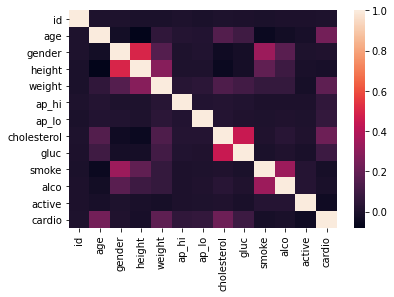

In [11]:
import seaborn as sns
sns.heatmap(df.corr())

In [12]:
#sns.pairplot(df)

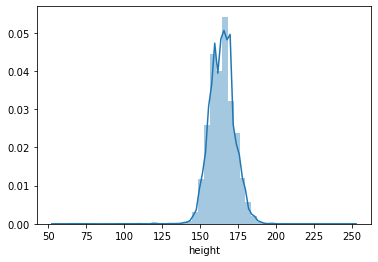

In [13]:
# This looks like a normal distribution
sns.distplot(df["height"].dropna())

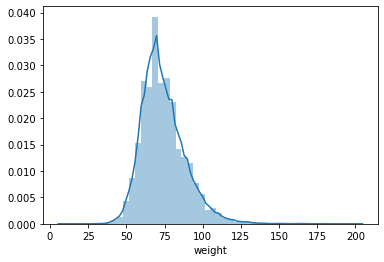

In [14]:
sns.distplot(df["weight"].dropna())

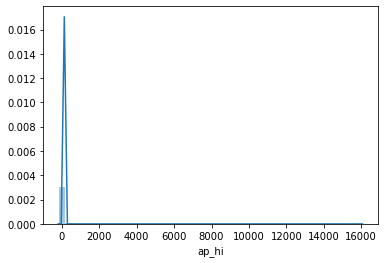

In [15]:
sns.distplot(df["ap_hi"].dropna())

(array([6.9289e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([ -150.,  1467.,  3084.,  4701.,  6318.,  7935.,  9552., 11169.,
        12786., 14403., 16020.]),
 <a list of 10 Patch objects>)

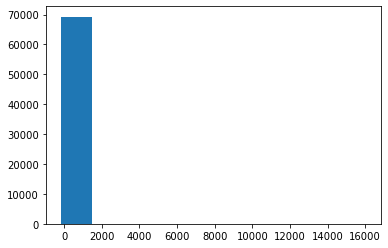

In [16]:
import matplotlib.pyplot as plt
plt.hist(df["ap_hi"])

(array([6.9069e+04, 2.0800e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 3.0000e+00, 1.1000e+01, 4.0000e+00, 4.0000e+00]),
 array([  -70.,  1037.,  2144.,  3251.,  4358.,  5465.,  6572.,  7679.,
         8786.,  9893., 11000.]),
 <a list of 10 Patch objects>)

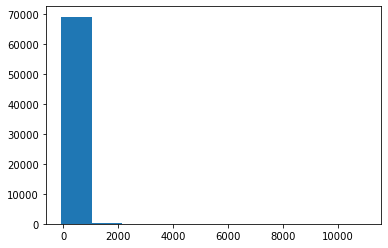

In [17]:
plt.hist(df["ap_lo"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2026739e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b20270b240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b202673278>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2026e2160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2026bcb70>],
 'means': []}

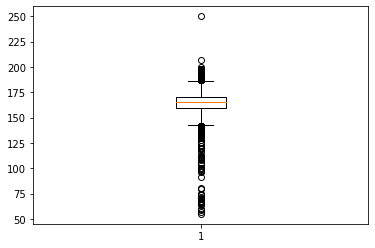

In [18]:
# finding the outliers with the felp of boxplot
import seaborn as sns
plt.boxplot(df["height"])

In [19]:
df["height"].describe()

count    69301.000000
mean       164.362217
std          8.205337
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b202ba2c18>,
 'caps': [<matplotlib.lines.Line2D at 0x1b202bb2d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b202aa2f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1b202c190b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b202c31320>],
 'means': []}

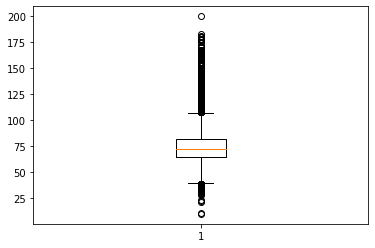

In [20]:
import seaborn as sns
plt.boxplot(df["weight"])

In [21]:
df["weight"].describe()

count    69301.000000
mean        74.203027
std         14.383469
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b202d8bd68>,
 'caps': [<matplotlib.lines.Line2D at 0x1b202d9c4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b202d8ba58>],
 'medians': [<matplotlib.lines.Line2D at 0x1b202d9cba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b202d9cf28>],
 'means': []}

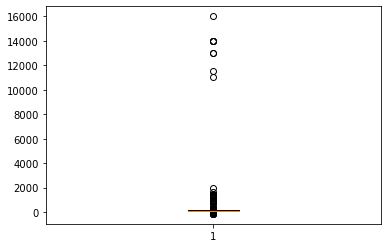

In [22]:
import seaborn as sns
plt.boxplot(df["ap_hi"])

In [23]:
df["ap_hi"].describe()

count    69301.000000
mean       128.829584
std        154.775805
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [24]:
df["ap_lo"].describe()

count    69301.000000
mean        96.650092
std        189.096240
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

If The Data Is Normally Distributed We use this method 

In [25]:
# using a 3rd std we will calculate the boundaries which differentiates the outliers
mean=df["height"].mean()
upper_boundry = df["height"].mean() + 3*df["height"].std()
lower_boundry = df["height"].mean() - 3*df["height"].std()
print(upper_boundry)
print(lower_boundry)
print(mean)

188.9782281215961
139.7462058692554
164.36221699542574


In [26]:
df=df[df["height"]>lower_boundry]

In [27]:
df=df[df["height"]<upper_boundry]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b202e04eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b202e115f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b202e04ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b202e11cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b202e1b0b8>],
 'means': []}

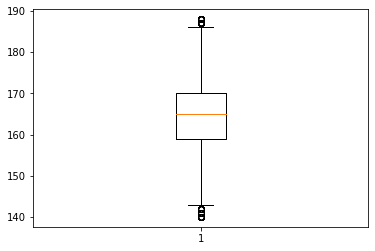

In [28]:
plt.boxplot(df["height"])

In [29]:
mean=df["weight"].mean()
upper_boundry = df["weight"].mean() + 3*df["weight"].std()
lower_boundry = df["weight"].mean() - 3*df["weight"].std()
print(upper_boundry)
print(lower_boundry)
print(mean)

117.07069868837726
31.257820780097852
74.16425973423756


In [30]:
# removing the outliers
df=df[df["weight"]>lower_boundry]

In [31]:
df=df[df["weight"]<upper_boundry]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b202e6e748>,
 'caps': [<matplotlib.lines.Line2D at 0x1b202e6ee48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b202e6e438>],
 'medians': [<matplotlib.lines.Line2D at 0x1b202e7a588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b202e7a908>],
 'means': []}

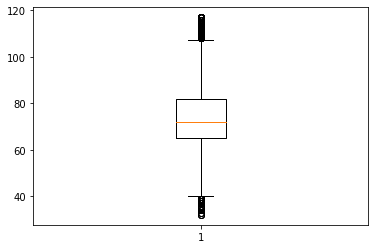

In [32]:
plt.boxplot(df["weight"])

In [33]:
mean=df["ap_lo"].mean()
upper_boundry = df["ap_lo"].mean() + 3*df["ap_lo"].std()
lower_boundry = df["ap_lo"].mean() - 3*df["ap_lo"].std()
print(upper_boundry)
print(lower_boundry)
print(mean)

664.2778468582312
-471.5625472313928
96.35764981341919


In [34]:
q1= df["ap_lo"].quantile(0.25)
q2= df["ap_lo"].quantile(0.75)

In [35]:
IQR = q2-q1
print(IQR)

10.0


In [36]:
# CALCULATING THE CUTOFF OUTLIERS
cut_off = IQR * 1.5

In [37]:
# CALCULATING THE CUTOFF OUTLIERS
cut_off = IQR * 1.5
print(cut_off)

15.0


In [38]:
lower, upper = q1 - cut_off, q2 + cut_off
print(lower)
print(upper)

65.0
105.0


In [39]:
# removing the outliers
df=df[df["ap_lo"]>lower]

In [40]:
df=df[df["ap_lo"]<upper]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b202ed2f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1b202edf668>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b202ed2c18>],
 'medians': [<matplotlib.lines.Line2D at 0x1b202edfd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b202eea128>],
 'means': []}

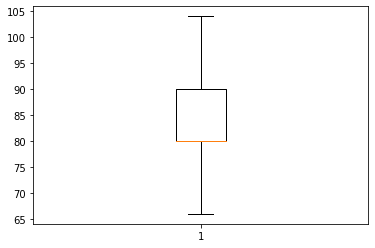

In [41]:
plt.boxplot(df["ap_lo"])

In [42]:
q1= df["ap_hi"].quantile(0.25)
q2= df["ap_hi"].quantile(0.75)

In [43]:
IQR = q2-q1
print(IQR)

20.0


In [44]:
# CALCULATING THE CUTOFF OUTLIERS
cut_off = IQR * 1.5

In [45]:
# CALCULATING THE CUTOFF OUTLIERS
cut_off = IQR * 1.5
print(cut_off)

30.0


In [46]:
lower, upper = q1 - cut_off, q2 + cut_off
print(lower)
print(upper)

90.0
170.0


In [47]:
# removing the outliers
df=df[df["ap_hi"]>lower]

In [48]:
df=df[df["ap_hi"]<upper]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b202f40c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1b202f4d3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b202f40978>],
 'medians': [<matplotlib.lines.Line2D at 0x1b202f4dac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b202f4de48>],
 'means': []}

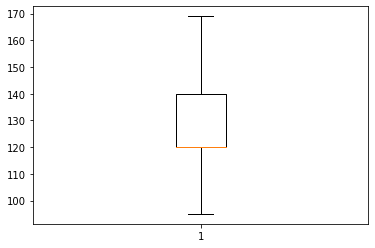

In [49]:
plt.boxplot(df["ap_hi"])

In [50]:
df.skew()

id            -0.002617
age           -0.315805
gender         0.625925
height         0.073620
weight         0.561139
ap_hi          0.677875
ap_lo          0.447828
cholesterol    1.618849
gluc           2.428527
smoke          2.931585
alco           4.010416
active        -1.533069
cardio         0.022418
dtype: float64

In [51]:
import scipy.stats as stat
import pylab
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

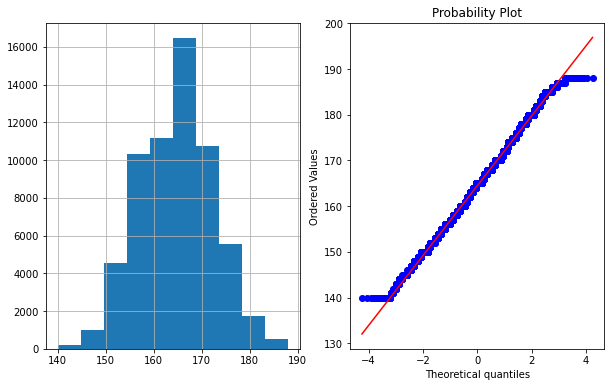

In [52]:
plot_data(df,'height')


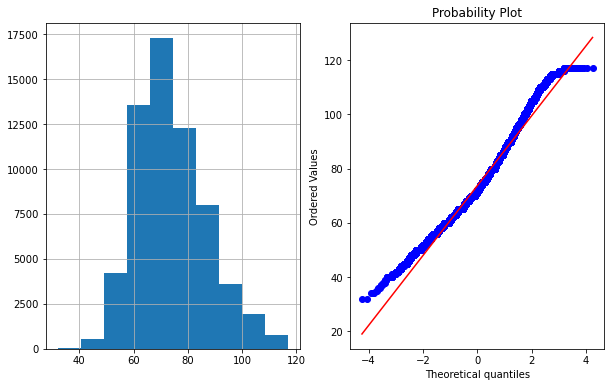

In [53]:
plot_data(df,'weight')

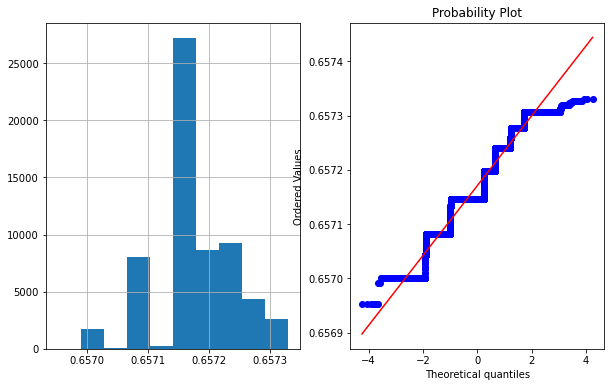

In [54]:
# apply boxcox transformation in ap_hi columns for a normal distribution
df['ap_hi_Boxcox'],parameters=stat.boxcox(df['ap_hi'])
plot_data(df,'ap_hi_Boxcox')

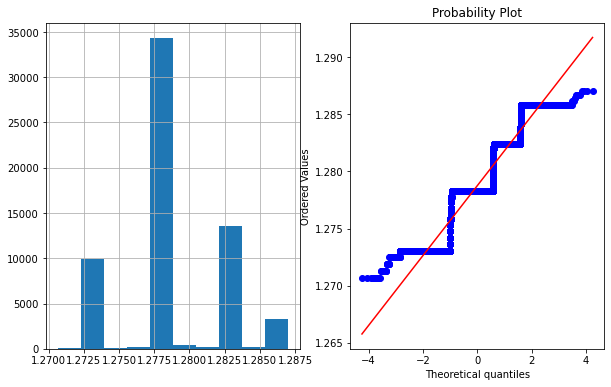

In [55]:
# apply boxcox transformation in ap_lo columns for a normal distribution
df['ap_lo_Boxcox'],parameters=stat.boxcox(df['ap_lo'])
plot_data(df,'ap_lo_Boxcox')

In [56]:
X=df.drop("cardio",axis=1)

In [57]:
y=df["cardio"]

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=50,test_size=20)

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
import warnings 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model= [LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier() , ExtraTreesClassifier() , RandomForestClassifier()
       ]

In [60]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('accuracy score of m',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

accuracy score of m LogisticRegression() is
0.8
[[9 1]
 [3 7]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20

accuracy score of m GaussianNB() is
0.55
[[8 2]
 [7 3]]
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.60      0.30      0.40        10

    accuracy                           0.55        20
   macro avg       0.57      0.55      0.52        20
weighted avg       0.57      0.55      0.52        20

accuracy score of m SVC() is
0.45
[[6 4]
 [7 3]]
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.43      0.30      0.35        10

    accuracy  

In [61]:
# using a KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.50


In [62]:
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, X, y, cv=10, scoring ='accuracy').mean())

0.497254624055703


In [63]:

model = LogisticRegression()
print (cross_val_score(model, X, y, cv=10, scoring = 'accuracy').mean())

0.6945210990446127


In [64]:

model = DecisionTreeClassifier()
print (cross_val_score(model, X, y, cv=10, scoring = 'accuracy').mean())

0.6177499286004482


In [65]:

model = ExtraTreesClassifier()
print (cross_val_score(model, X, y, cv=10, scoring = 'accuracy').mean())

0.7095667947578238


In [67]:
# saving the model with logistic regression 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=50)
model = LogisticRegression()
m.fit(X_train,y_train)
y_pred=m.predict(X_test)